# Importing necsssary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Loading the dataset

In [3]:
data = pd.read_csv("D:/newai/Data Analysis Project/Ford Go bike/201902-fordgobike-tripdata.csv")

In [4]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Processing the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [ ]:
data.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We can notice here that there's NaN values in the data

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe(include='all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183412.000000,183412,183412,183215.000000,183215,183412.000000,183412.000000,183215.000000,183215,183412.000000,183412.000000,183412.000000,183412,175147.000000,175147,183412
unique,NaN,183401,183397,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2019-02-25 08:52:07.5820,2019-02-11 08:03:22.6020,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163544,NaN,130651,166053
mean,726.078435,NaN,NaN,138.590427,NaN,37.771223,-122.352664,136.249123,NaN,37.771427,-122.352250,4472.906375,NaN,1984.806437,NaN,NaN
std,1794.389780,NaN,NaN,111.778864,NaN,0.099581,0.117097,111.515131,NaN,0.099490,0.116673,1664.383394,NaN,10.116689,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453704,3.000000,NaN,37.317298,-122.453704,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


There is a big differnce between mean and min and max in duration_sec and start_station_id

# Cleaning the data

In [ ]:
# Changing the columns names
data.rename(columns={
    'duration_sec':'Duration_Sec', 'start_time':'Start_Time', 'end_time':'End_Time','start_station_id':'Start_Station_Id',
       'start_station_name':'Start_Station_Name', 'start_station_latitude':'Start_Station_Latitude',
       'start_station_longitude':'Start_Station_Longitude', 'end_station_id':'End_Station_Id',
       'end_station_name':'End_Station_Name',
       'end_station_latitude':'End_Station_Latitude', 'end_station_longitude':'End_Station_Longitude', 
       'bike_id':'Bike_Id', 'user_type':'User_Type','member_birth_year':'Member_Birth_Year', 
       'member_gender':'Member_Gender','bike_share_for_all_trip':'Bike_Share_For_All_Trip'
},inplace=True)

In [ ]:
data.head()

,Duration_Sec,Start_Time,End_Time,Start_Station_Id,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Station_Id,End_Station_Name,End_Station_Latitude,End_Station_Longitude,Bike_Id,User_Type,Member_Birth_Year,Member_Gender,Bike_Share_For_All_Trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
# Drop the NaN values
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Duration_Sec             174952 non-null  int64  
 1   Start_Time               174952 non-null  object 
 2   End_Time                 174952 non-null  object 
 3   Start_Station_Id         174952 non-null  float64
 4   Start_Station_Name       174952 non-null  object 
 5   Start_Station_Latitude   174952 non-null  float64
 6   Start_Station_Longitude  174952 non-null  float64
 7   End_Station_Id           174952 non-null  float64
 8   End_Station_Name         174952 non-null  object 
 9   End_Station_Latitude     174952 non-null  float64
 10  End_Station_Longitude    174952 non-null  float64
 11  Bike_Id                  174952 non-null  int64  
 12  User_Type                174952 non-null  object 
 13  Member_Birth_Year        174952 non-null  float64
 14  Member_Ge

We can notice that the Start_Time and End_Time datatype is object 

In [ ]:
# Creating new column for hour
data['Duration_Hour'] = data['Duration_Sec'] / 3600

In [ ]:
data.head()

,Duration_Sec,Start_Time,End_Time,Start_Station_Id,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Station_Id,End_Station_Name,End_Station_Latitude,End_Station_Longitude,Bike_Id,User_Type,Member_Birth_Year,Member_Gender,Bike_Share_For_All_Trip,Duration_Hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,14.495833
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,17.181667
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,10.136111
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,0.440278
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,0.498056


In [ ]:
# Changing the data type from object to datetime
data['Start_Time'] = data['Start_Time'].astype('datetime64[ns]')
data['End_Time'] = data['End_Time'].astype('datetime64[ns]')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Duration_Sec             174952 non-null  int64         
 1   Start_Time               174952 non-null  datetime64[ns]
 2   End_Time                 174952 non-null  datetime64[ns]
 3   Start_Station_Id         174952 non-null  float64       
 4   Start_Station_Name       174952 non-null  object        
 5   Start_Station_Latitude   174952 non-null  float64       
 6   Start_Station_Longitude  174952 non-null  float64       
 7   End_Station_Id           174952 non-null  float64       
 8   End_Station_Name         174952 non-null  object        
 9   End_Station_Latitude     174952 non-null  float64       
 10  End_Station_Longitude    174952 non-null  float64       
 11  Bike_Id                  174952 non-null  int64         
 12  User_Type            

# Visualization and analysis

Q1 what times are popular for ride?

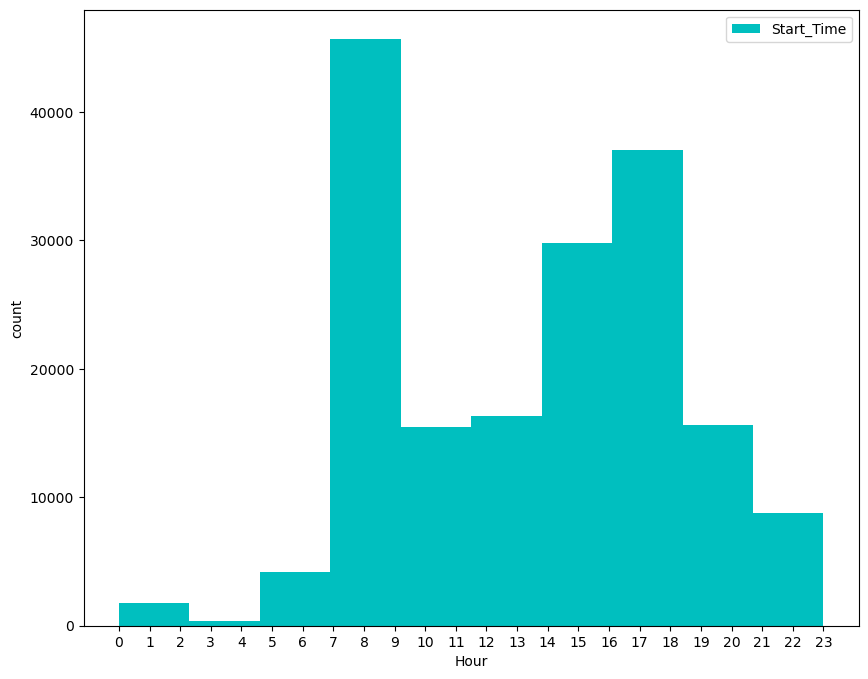

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data.Start_Time.dt.hour, color='c', label='Start_Time');
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('count')
plt.legend()

These data show that the two hours with the highest numbers are 7 and 8, after which it decreases significantly, then we increase from 2 to 5, then it gradually decreases again.

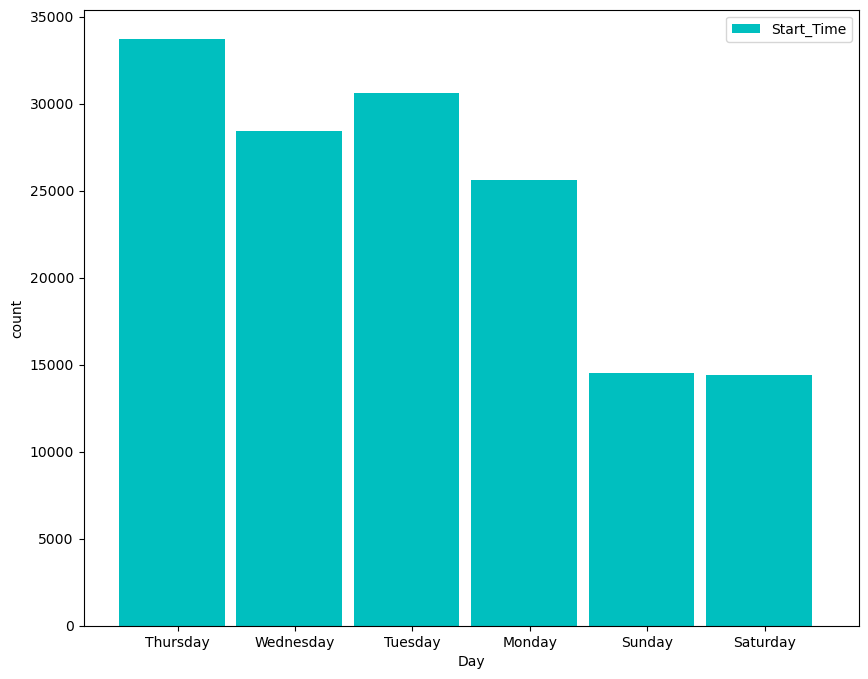

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data.Start_Time.dt.day_name(), color='c', bins=np.arange(-0.5, 6.5,1 ), width=0.9, label='Start_Time');
plt.xlabel('Day')
plt.ylabel('count')
plt.legend()

This data show the number is few on sunday and saturday and be more on thursday and tuesday and more another day also

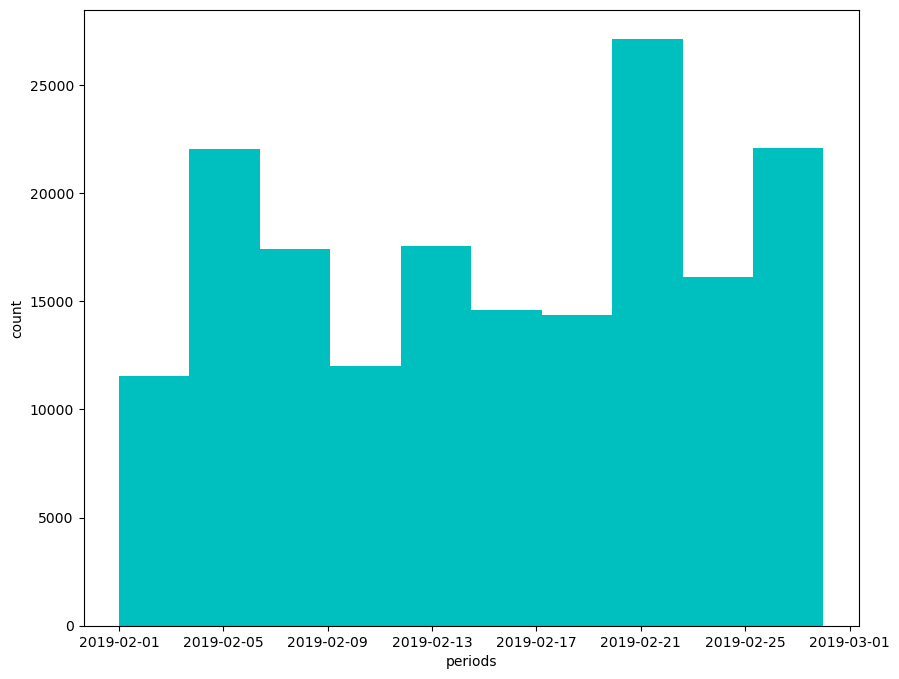

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data.Start_Time.dt.date, color='c');
plt.xlabel('periods')
plt.ylabel('count');

Shows all the periods

******

Q2 what is gender and age breakdown of rides?

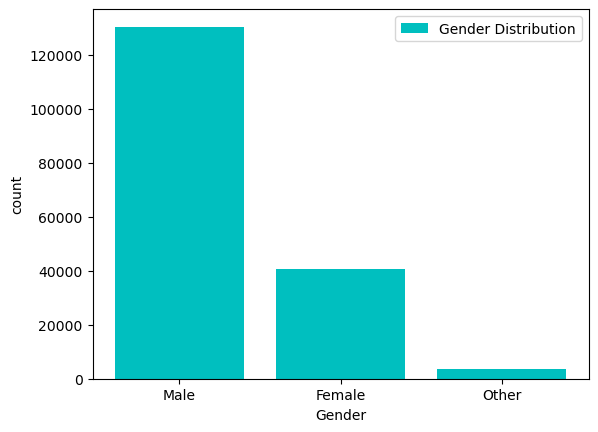

In [ ]:
Gender_counts = data.Member_Gender.value_counts()
plt.bar(Gender_counts.index, Gender_counts.values, color='c', label='Gender Distribution');
plt.xlabel('Gender')
plt.ylabel('count')
plt.legend();

Q3 How long do ride-goers rent a bike and respect the age?

In [ ]:
df = data.groupby('Member_Birth_Year')['Duration_Hour'].agg(['mean', 'count', 'max'])

In [ ]:
df

,mean,count,max
Member_Birth_Year,,,
1878.0,0.409444,1,0.409444
1900.0,0.192683,53,0.525833
1901.0,0.125370,6,0.149722
1902.0,0.141035,11,0.189167
1910.0,0.201944,1,0.201944
...,...,...,...
1997.0,0.179899,3476,14.302222
1998.0,0.201489,3208,22.920000
1999.0,0.179260,2504,4.873889


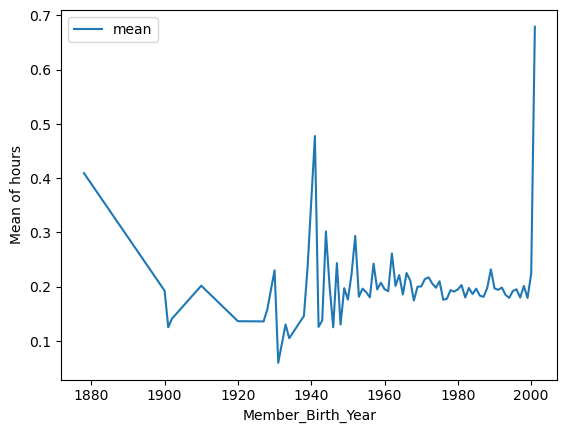

In [ ]:
df.plot(y='mean')
plt.ylabel('Mean of hours');

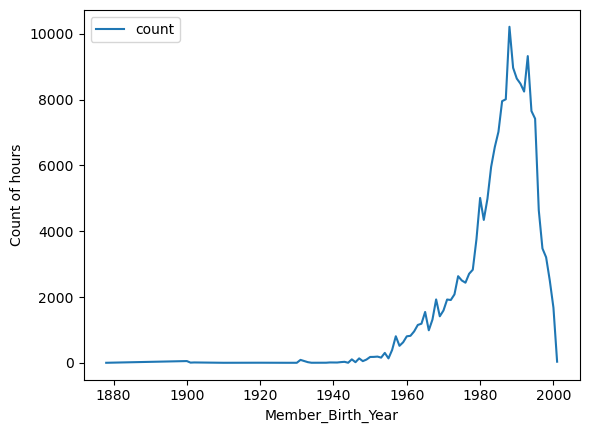

In [ ]:
df.plot(y='count')
plt.ylabel('Count of hours');